## Data Mining Key Tasks for Cardiovascular Disease Prediction

In our project, we employ two fundamental data mining tasks to facilitate the prediction of cardiovascular diseases:

### 1. Classification:

**Goal:** 
The primary objective of classification is to predict whether a patient has cardiovascular diseases based on medical examinations and health parameters.

**Features:** 
We utilize essential parameters such as diastolic and systolic blood pressure, height, and weight to inform the classification model.

**Method:** 
We train a classification model on the 'cardio' class to discern the presence or absence of cardiovascular diseases.

### 2. Clustering:

**Goal:**
The overarching aim of clustering is to identify inherent patterns in patient data and group individuals with similar health characteristics into clusters.

**Objectives:** 
Clustering endeavors to group patients with similar health characteristics into clusters, thereby revealing underlying patterns in the data.

**Application:** 
These established clusters are then used to predict the cardiovascular health of new patients by associating them with relevant cluster patterns.

**Benefits:** 
Clustering enhances our understanding of patient subgroups, facilitating more accurate predictions for new patients based on established health patterns.

By integrating classification for individual predictions and clustering for broader insights, our approach endeavors to offer a comprehensive and precise assessment of cardiovascular disease likelihood.


# Dataset Information
|                |                                          |
|----------------|------------------------------------------|
| **Class Label**| cardio                                   |
| **Number of Rows** | 500                                    |
| **Number of Columns** | 13                                  |

## Dataset Source
This dataset is owned by Svetlana Ulianova. All of the dataset values were collected at the moment of medical examination.
There are 3 types of input features:
- **Objective**: factual information;
- **Examination**: results of medical examination;
- **Subjective**: information given by the patient.

The dataset used in this analysis is sourced from Kaggle. It is available at the following Kaggle dataset page:
[Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

## Columns
| Column          | Description                                        |
|-----------------|----------------------------------------------------|
| id              | Patient ID                                         |
| age             | Age of the patient (in days) (3650-29200)          |
| gender          | Gender of the patient (1: female, 2: male)        |
| height          | Height of the patient (in cm) (75-200)             |
| weight          | Weight of the patient (in kg) (15-200)             |
| ap_hi           | Systolic blood pressure (80-190)                   |
| ap_lo           | Diastolic blood pressure (30-1100)                 |
| cholesterol     | Cholesterol level (1: normal, 2: above normal, 3: well above normal) |
| gluc            | Glucose level (1: normal, 2: above normal, 3: well above normal) |
| smoke           | Smoking status (0: non-smoker, 1: smoker)          |
| alco            | Alcohol consumption status (0: non-drinker, 1: drinker) |
| active          | Physical activity level (0: inactive, 1: active)   |
| cardio          | Presence of cardiovascular disease (0: no, 1: yes) |



## Loading the Dataset and Overview

Before diving into any data analysis or preprocessing, it's essential to load the dataset and understand its structure and contents. This initial step allows us to familiarize ourselves with the data, including its dimensions, column names, and the type of information it contains.

### Steps:
1. **Load the Dataset**: Begin by loading the dataset into your programming environment. This typically involves reading the data from a file, such as a CSV or Excel file, into a dataframe or other data structure.

2. **Explore the Structure**: Once the dataset is loaded, take a closer look at its structure. Determine the number of rows and columns, examine the column names, and identify the types of data present in each column.

3. **Inspect the Contents**: After understanding the dataset's structure, inspect the contents of the data. Look for any missing values, anomalies, or inconsistencies that may require cleaning or preprocessing.

By following these steps, we can gain valuable insights into the dataset and prepare it for further analysis and modeling.


In [17]:
#Importing necessary libraries:
import pandas as pd ## Pandas for data manipulation
import matplotlib.pyplot as plt ## Matplotlib for plotting
from scipy import stats ## Scipy for scientific and technical computing
from sklearn.feature_selection import VarianceThreshold ## For feature selection based on variance
from sklearn.preprocessing import MinMaxScaler ## For feature scaling
df = pd.read_csv('cardio_train.csv')

In [18]:
# Displaying a sample of the dataset to get a quick overview

print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [19]:
# Checking for missing values in our dataset:
missing_values = df.isna().sum()

# Displaying the count of missing values for each column
print("Missing values")
print(missing_values)



Missing values
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


# Note: If all counts are zero, it means there are no missing values in the dataset.

In this case, it seems we don't have any missing values.


## Computing Basic Statistics

Understanding the basic statistics of the dataset can provide valuable insights into the distribution and characteristics of the features. In this step, we'll compute statistical summaries for numerical features, including measures such as mean, standard deviation, minimum, maximum, and quartiles.

### Steps:
1. **Select Numerical Features**: Identify the numerical features in the dataset that we want to analyze. These typically include continuous variables such as age, height, weight, and blood pressure.

2. **Compute Statistical Summaries**: For each numerical feature, calculate basic statistics such as the mean, standard deviation, minimum, maximum, and quartiles. These summaries provide a comprehensive overview of the distribution and variability of each feature.

3. **Interpret Results**: Analyze the computed statistics to gain insights into the distribution and characteristics of the numerical features. Look for patterns, outliers, or any other notable observations that may inform subsequent data analysis or preprocessing steps.

By computing basic statistics for numerical features, we can gain a deeper understanding of the dataset and make informed decisions during the data analysis process.


In [20]:
# Statistical Summaries for the 'age' column
mean_age = df["age"].mean()
print(f"The mean for age is: {mean_age}")

median_age = df["age"].median()
print(f"The median for age is: {median_age}")

min_age = df ["age"].min()
print(f"The min for age is: {min_age}")

max_age = df["age"].max()
print(f"The max for age is: {max_age}")

var_age = df["age"].var()
print(f"The variance for age is: {var_age}")

# Quantiles for the entire dataset
df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

# Statistical Summaries for the 'height' column
mean_height = df["height"].mean()
print(f"The mean for height is: {mean_height}")

median_height = df["height"].median()
print(f"The median for height is: {median_height}")

min_height = df ["height"].min()
print(f"The min for height is: {min_height}")

max_height = df["height"].max()
print(f"The max for height is: {max_height}")

var_height = df["height"].var()
print(f"The variance for height is: {var_height}")

# Statistical Summaries for the 'weight' column
mean_weight = df["weight"].mean()
print(f"The mean for weight is: {mean_weight}")

median_weight = df["weight"].median()
print(f"The median for weight is: {median_weight}")

min_weight = df ["weight"].min()
print(f"The min for weight is: {min_weight}")

max_weight = df["weight"].max()
print(f"The max for weight is: {max_weight}")

var_weight = df["weight"].var()
print(f"The variance for weight is: {var_weight}")

# Descriptive statistics for the entire dataset
df.describe()

#Notes for Statistical Summaries:
# 1. *Age Analysis:*
#    - Mean Age: Calculated as the average age of individuals in the DataFrame.
#    - Median Age: Calculated as the middle value of the sorted age data.
#    - Minimum Age: The smallest age present in the DataFrame.
#    - Maximum Age: The largest age present in the DataFrame.
#    - Variance of Age: A measure of how much the ages vary from the mean.

# 2. *Height Analysis:*
#    - Mean Height: Average height of individuals in the DataFrame.
#    - Median Height: The middle value of the sorted height data.
#    - Minimum Height: The shortest height present in the DataFrame.
#    - Maximum Height: The tallest height present in the DataFrame.
#    - Variance of Height: Indicates how much the heights deviate from the mean height.

# 3. *Weight Analysis:*
#    - Mean Weight: The average weight of individuals in the DataFrame.
#    - Median Weight: The middle value of the sorted weight data.
#    - Minimum Weight: The lowest weight present in the DataFrame.
#    - Maximum Weight: The highest weight present in the DataFrame.
#    - Variance of Weight: Reflects how much the weights differ from the mean weight.

The mean for age is: 19546.645290581164
The median for age is: 19715.0
The min for age is: 14321
The max for age is: 23661
The variance for age is: 5889886.377944644
The mean for height is: 164.04008016032063
The median for height is: 164.0
The min for height is: 76
The max for height is: 188
The variance for height is: 84.6409606361317
The mean for weight is: 74.44549098196393
The median for weight is: 72.0
The min for weight is: 41.0
The max for weight is: 200.0
The variance for weight is: 264.4575448889747


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,348.450902,19546.645291,1.358717,164.040080,74.445491,128.146293,92.310621,1.390782,1.228457,0.094188,0.042084,0.785571,0.525050
std,207.505550,2426.908811,0.480105,9.200052,16.262151,17.419944,100.029382,0.692469,0.573785,0.292384,0.200983,0.410837,0.499873
min,0.000000,14321.000000,1.000000,76.000000,41.000000,80.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,169.500000,18044.000000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,343.000000,19715.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526.500000,21703.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,714.000000,23661.000000,2.000000,188.000000,200.000000,190.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing Data Distribution with Box Plots

Visualizing the distribution of data can help us identify patterns and potential outliers in the dataset. In this step, we'll use box plots to visualize the distribution of numerical features and identify any outliers that may need to be addressed.

### Steps:
1. **Select Numerical Features**: Choose the numerical features in the dataset that we want to visualize. These features typically include continuous variables such as age, height, weight, and blood pressure.

2. **Create Box Plots**: Generate box plots for each numerical feature to visualize their distributions. Box plots provide a visual summary of the data's central tendency, spread, and potential outliers.

3. **Identify Outliers**: Inspect the box plots for any data points that fall outside the whiskers of the box plot. These points are potential outliers and may require further investigation or preprocessing.

4. **Interpret Results**: Analyze the box plots to understand the distribution of each numerical feature and identify any outliers or unusual patterns. Consider how these findings may impact subsequent data analysis or modeling steps.

By visualizing the distribution of data using box plots, we can gain insights into the dataset's characteristics and make informed decisions about handling outliers or other anomalies.


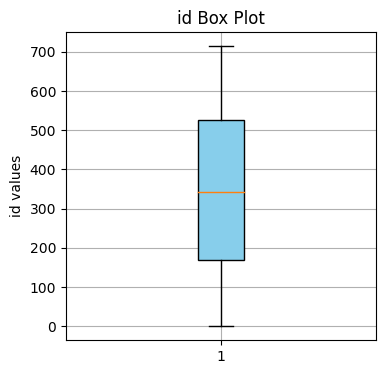

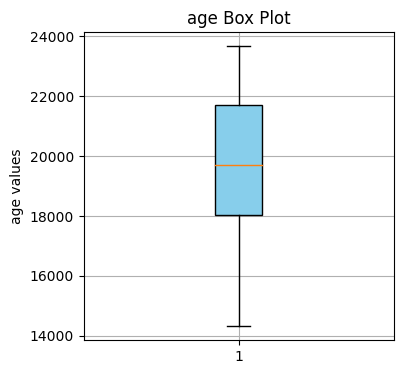

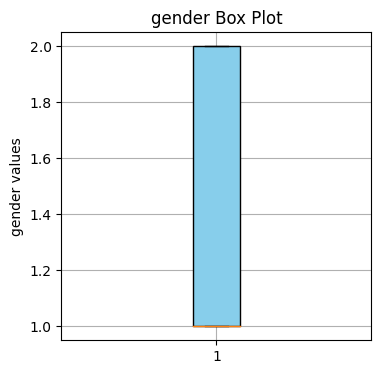

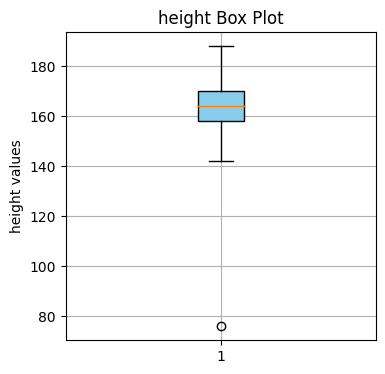

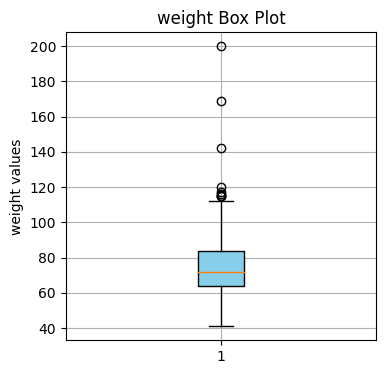

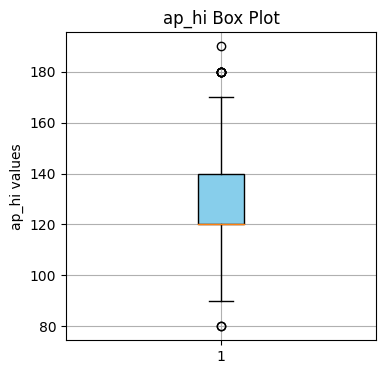

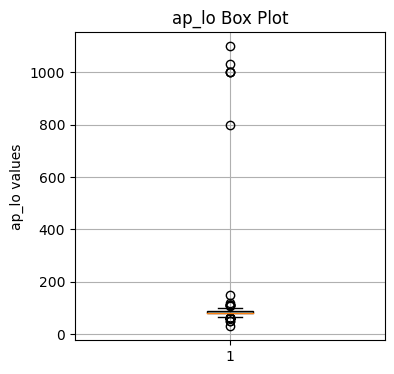

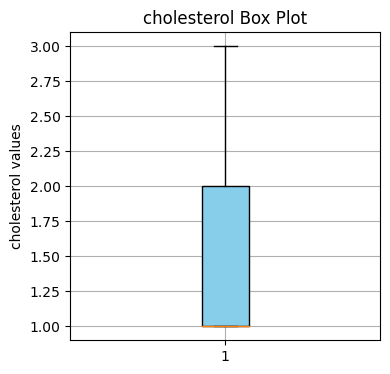

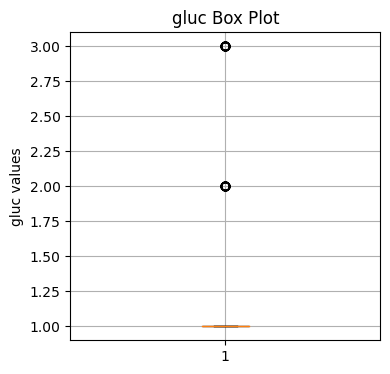

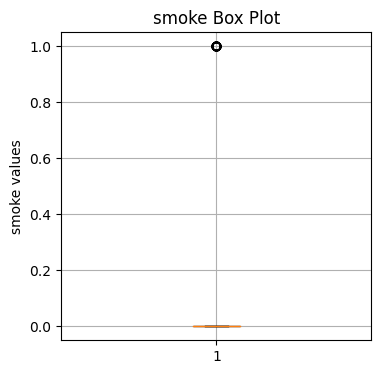

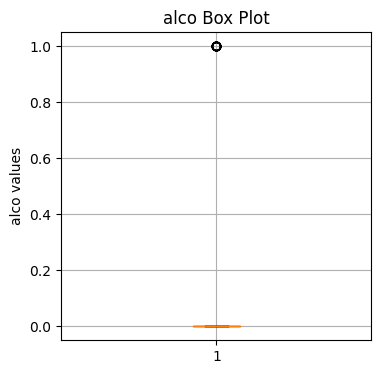

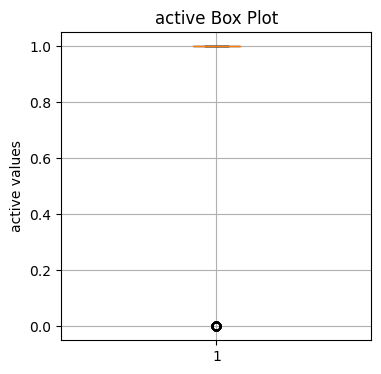

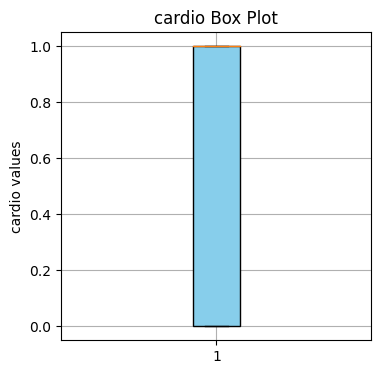

In [21]:
# Boxplots for each column in the DataFrame
for column in df.columns:
  
    # Create a figure with specified size
    plt.figure(figsize=(4, 4))
  
    # Create a boxplot with custom styling
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
  
    # Set plot title and labels
    plt.title(f'{column} Box Plot')
    plt.ylabel(f'{column} values')
     
    # Add gridlines for better visualization
    plt.grid(True)
  
    # Display the boxplot  
    plt.show()



# Graph Description:

- **Age Boxplot**: 
  - There are no outliers in the age attribute, but the wide range of ages could lead to calculation conflicts. Transformation may be needed to normalize the age distribution and bring it within a smaller, more common range.
  
- **Height Boxplot**: 
  - One outlier is observed, indicating a significantly small measure of height. Smoothing this outlier will help improve the accuracy of the height data.
  
- **Weight Boxplot**: 
  - Numerous outliers are present in the weight attribute, indicating potential noise in the data. Smoothing these outliers during preprocessing will help remove noise and improve data quality.
  
- **ap_hi Boxplot**: 
  - Values in the dataset show a narrow range for systolic blood pressure (ap_hi). Some outliers are identified, necessitating preprocessing to handle them effectively.
  
- **ap_lo Boxplot**: 
  - Values for diastolic blood pressure (ap_lo) are closely clustered. However, there are numerous outliers that need to be addressed during preprocessing to ensure data integrity.


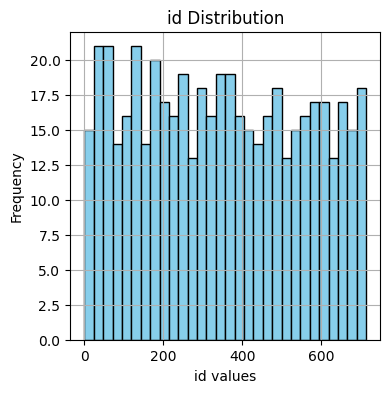

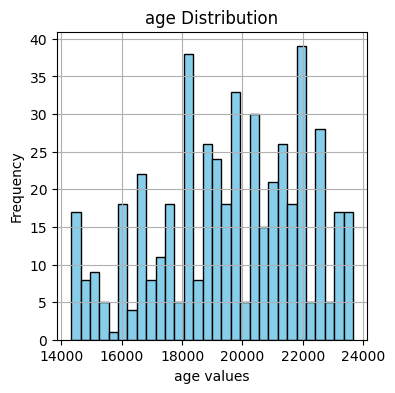

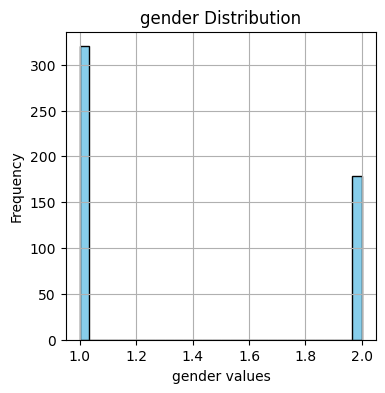

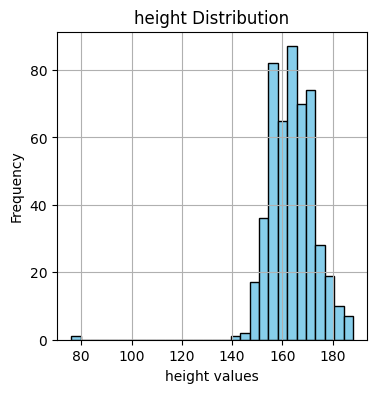

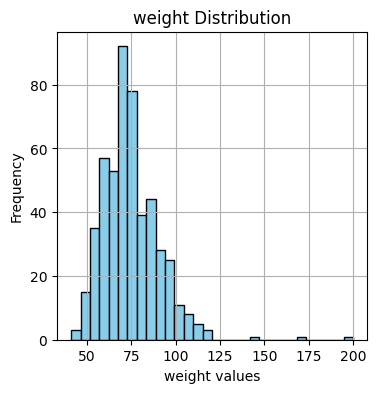

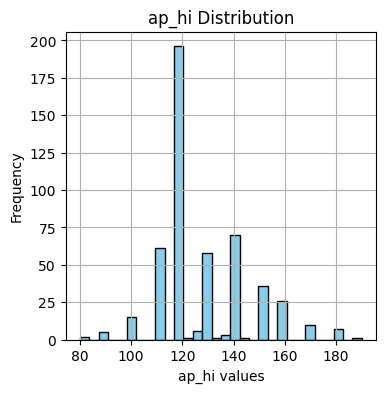

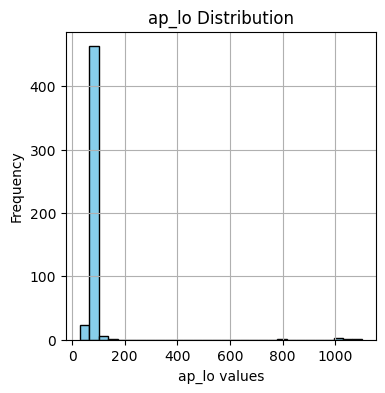

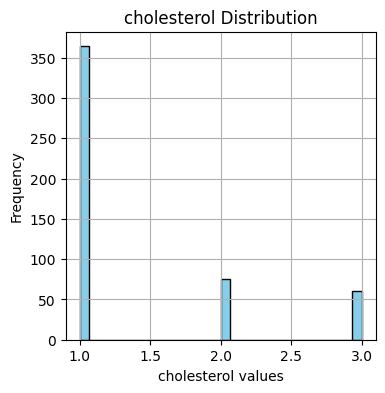

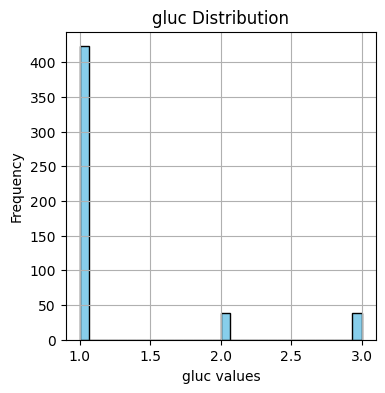

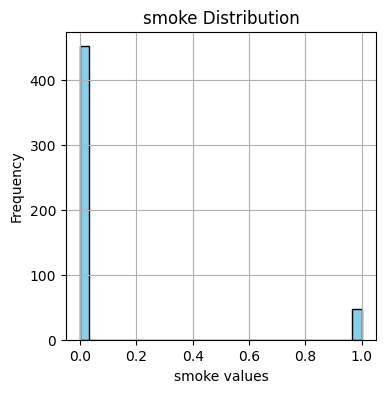

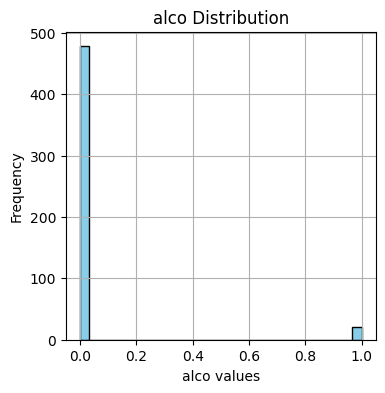

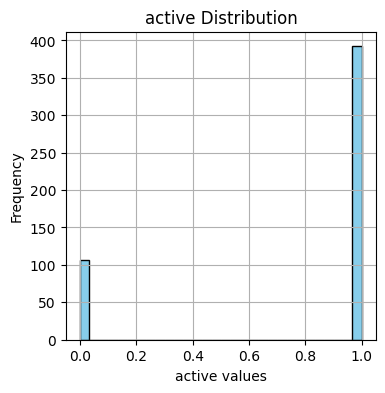

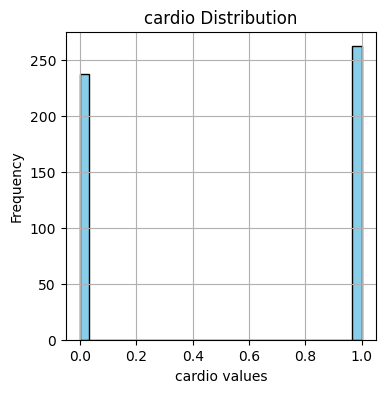

In [22]:
# Histograms for each column in the DataFrame
for column in df.columns:
  
    # Create a figure with specified size 
    plt.figure(figsize=(4, 4))
  
    # Create a histogram with specified bins, color, and edgecolor
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
  
    # Set plot title and labels 
    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column} values')
    plt.ylabel('Frequency')

    # Add gridlines for better visualization
    plt.grid(True)
  
    # Display the histogram 
    plt.show()




# Graph Description for Patient's Weight:

After observation, we noticed that the majority of values lie within the normal weight range, approximately from 55 to 80. However, there are also numerous outliers present in the dataset, indicating potential inconsistencies or noise in the data.


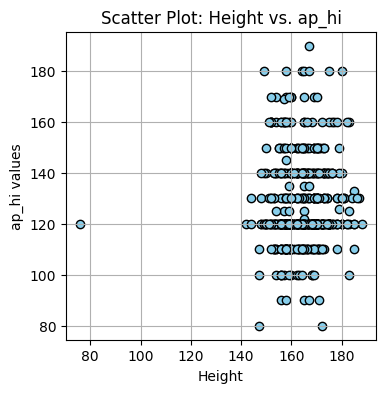

In [23]:
# Set the size of the figure
plt.figure(figsize=(4, 4))

# Create a scatter plot between 'height' and 'ap_hi'
plt.scatter(df['height'], df['ap_hi'], color='skyblue', edgecolor='black')

# Set the title of the plot
plt.title('Scatter Plot: Height vs. ap_hi')

# Label the x-axis
plt.xlabel('Height')

# Label the y-axis
plt.ylabel('ap_hi values')

# Add gridlines for better visualization
plt.grid(True)

# Display the scatter plot
plt.show()



# Graph Description:

This scatterplot helps us determine whether height and ap_hi are correlated. It indicates that the two attributes are not correlated and do not exhibit a proportional relationship.


### Distribution of Cardiovascular Disease Classes

This pie chart offers a comprehensive portrayal of the distribution of cardiovascular disease classes within the dataset. It categorizes individuals into two distinct classes: those classified as absent (Class 0) and those classified as present (Class 1) for cardiovascular disease. Each segment corresponds to the relative proportion of instances associated with its respective class. This visualization provides a succinct summary, elucidating the relative prevalence of cardiovascular disease within the dataset.


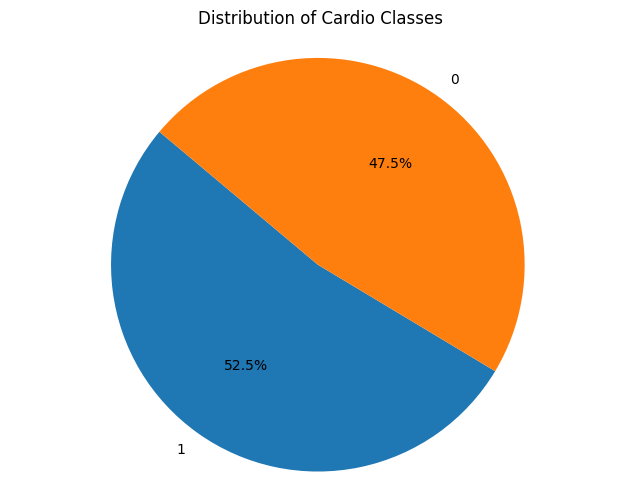

In [24]:
# Count the occurrences of each class in the 'cardio' column
class_counts = df['cardio'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cardio Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Identifying and Removing Outliers

Outliers are data points that deviate significantly from the rest of the data and can adversely affect the performance of machine learning models. In this step, we'll use statistical methods such as the z-score to identify outliers and remove them from the dataset to improve its quality.

### Steps:
1. **Select Numerical Features**: Focus on numerical features in the dataset that are susceptible to outliers, such as continuous variables like age, height, weight, and blood pressure.

2. **Compute Z-Score**: Calculate the z-score for each data point in the selected numerical features. The z-score measures how many standard deviations a data point is from the mean of the feature. Data points with a high absolute z-score (e.g., greater than 3 or less than -3) are considered outliers.

3. **Identify Outliers**: Identify data points with high absolute z-scores as potential outliers. These data points deviate significantly from the rest of the data and may need to be removed to improve the quality of the dataset.

4. **Remove Outliers**: Remove the identified outliers from the dataset. This can be done by either excluding the outlier data points entirely or applying data transformation techniques to mitigate their impact on the analysis.

5. **Verify Results**: After removing outliers, verify the impact on the dataset's distribution and statistics. Ensure that the removal of outliers does not significantly alter the dataset's overall characteristics or introduce biases.

By identifying and removing outliers using statistical methods like the z-score, we can enhance the quality of the dataset and improve the reliability of subsequent machine learning models.


In [25]:
# Calculate Z-scores for each column in the DataFrame
z_scores = stats.zscore(df)

# Set the threshold for identifying outliers
threshold = 3

# Identify rows with outliers based on Z-scores
outliers = (abs(z_scores) > threshold).any(axis=1)

# Extract rows with outliers from the original DataFrame
outliers_df = df[outliers]

# Print rows containing outliers
print("Rows with Outliers:")
print(outliers_df)

Rows with Outliers:
      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7     12  22584       2     178    95.0    130     90            3     3   
14    23  14532       2     181    95.0    130     90            1     1   
17    27  16747       1     158    52.0    110     70            1     3   
19    29  21755       2     162    56.0    120     70            1     1   
29    40  21057       2     169    74.0    130     70            1     3   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
476  683  18825       2     164    68.0    140    100            1     1   
481  691  19589       1     158    86.0    160     50            2     3   
486  696  21939       2     160    85.0    130     90            2     1   
487  697  15975       1     158    69.0    110     80            1     3   
489  700  21681       2     167    73.0    180     80            3     3   

     smoke  alco  active  cardio  
7        0     0       1       1

In [26]:
# Define the columns to check for outliers
columns_to_check = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Iterate over each column to remove outliers
for column in columns_to_check:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for this column
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Save cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_cardio_train.csv', index=False)

In [27]:
df_clean = pd.read_csv('cleaned_cardio_train.csv')

In [28]:
# Statistical Summaries for the 'age' column
mean_age = df_clean["age"].mean()
print(f"The mean for age is: {mean_age}")

median_age = df_clean["age"].median()
print(f"The median for age is: {median_age}")

min_age = df_clean ["age"].min()
print(f"The min for age is: {min_age}")

max_age = df_clean["age"].max()
print(f"The max for age is: {max_age}")

var_age = df_clean["age"].var()
print(f"The variance for age is: {var_age}")

# Quantiles for the entire dataset
df_clean.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

# Statistical Summaries for the 'height' column
mean_height = df_clean["height"].mean()
print(f"The mean for height is: {mean_height}")

median_height = df_clean["height"].median()
print(f"The median for height is: {median_height}")

min_height = df_clean["height"].min()
print(f"The min for height is: {min_height}")

max_height = df_clean["height"].max()
print(f"The max for height is: {max_height}")

var_height = df_clean["height"].var()
print(f"The variance for height is: {var_height}")

# Statistical Summaries for the 'weight' column
mean_weight = df_clean["weight"].mean()
print(f"The mean for weight is: {mean_weight}")

median_weight = df_clean["weight"].median()
print(f"The median for weight is: {median_weight}")

min_weight = df_clean ["weight"].min()
print(f"The min for weight is: {min_weight}")

max_weight = df_clean["weight"].max()
print(f"The max for weight is: {max_weight}")

var_weight = df_clean["weight"].var()
print(f"The variance for weight is: {var_weight}")

# Descriptive statistics for the entire dataset
df_clean.describe()

#Notes for Statistical Summaries:
# 1. *Age Analysis:*
#    - Mean Age: Calculated as the average age of individuals in the DataFrame.
#    - Median Age: Calculated as the middle value of the sorted age data.
#    - Minimum Age: The smallest age present in the DataFrame.
#    - Maximum Age: The largest age present in the DataFrame.
#    - Variance of Age: A measure of how much the ages vary from the mean.

# 2. *Height Analysis:*
#    - Mean Height: Average height of individuals in the DataFrame.
#    - Median Height: The middle value of the sorted height data.
#    - Minimum Height: The shortest height present in the DataFrame.
#    - Maximum Height: The tallest height present in the DataFrame.
#    - Variance of Height: Indicates how much the heights deviate from the mean height.

# 3. *Weight Analysis:*
#    - Mean Weight: The average weight of individuals in the DataFrame.
#    - Median Weight: The middle value of the sorted weight data.
#    - Minimum Weight: The lowest weight present in the DataFrame.
#    - Maximum Weight: The highest weight present in the DataFrame.
#    - Variance of Weight: Reflects how much the weights differ from the mean weight.

The mean for age is: 19548.364653243847
The median for age is: 19715.0
The min for age is: 14321
The max for age is: 23661
The variance for age is: 5957760.290496685
The mean for height is: 164.30648769574944
The median for height is: 164.0
The min for height is: 142
The max for height is: 188
The variance for height is: 66.32962149256126
The mean for weight is: 73.75011185682327
The median for weight is: 72.0
The min for weight is: 44.0
The max for weight is: 112.0
The variance for weight is: 184.66138451660797


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,343.375839,19548.364653,1.357942,164.306488,73.750112,127.440716,81.785235,1.384787,1.223714,0.089485,0.038031,0.789709,0.527964
std,204.991156,2440.852370,0.479932,8.144300,13.589017,14.670230,7.691849,0.689148,0.567483,0.285763,0.191486,0.407972,0.499777
min,0.000000,14321.000000,1.000000,142.000000,44.000000,100.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,169.500000,18067.500000,1.000000,158.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,337.000000,19715.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,518.500000,21719.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,714.000000,23661.000000,2.000000,188.000000,112.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Separate features (X) and target variable (y)
X = df_clean.drop('cardio', axis=1)  # Features
y = df_clean['cardio']  # Target variable

# Initialize VarianceThreshold with a specified threshold
selector = VarianceThreshold(threshold=0.2)

# Fit and transform the features using VarianceThreshold
X_new = selector.fit_transform(X)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Print the original dataset
print("Original Dataset:")
print(X.head())

# Print the selected features after applying Variance Threshold
print("\nSelected Features after Variance Threshold:")
print(X[selected_features].head())


Original Dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0  

Selected Features after Variance Threshold:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc
0   0  18393       2     168    62.0    110     80            1     1
1   1  20228       1     156    85.0    140     90            3     1
2   2  18857       1     165    64.0    130     70            3     1
3   3  17623       2     169    82.0    150    100            1     

## Feature Engineering

Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models. In this step, we'll perform feature engineering tasks to enhance the dataset's predictive power.

### Tasks:
1. **Converting Age from Days to Years**: We'll convert the 'age' feature from days to years to make it more interpretable and relevant for analysis.

2. **Discretizing Age into Intervals**: Age is a continuous variable, but discretizing it into intervals can sometimes improve model performance. We'll divide the age range into predefined intervals, such as 'young', 'middle-aged', and 'elderly', to capture different age groups' characteristics.

3. **Other Potential Feature Engineering**: Depending on the dataset and problem domain, we may explore additional feature engineering tasks such as creating interaction terms, scaling features, or encoding categorical variables.

By performing feature engineering, we aim to extract more meaningful information from the dataset and enhance the predictive capabilities of our machine learning models.


In [30]:
# Function to convert age from days to years
def convert_days_to_years(age_in_days):
    return int(age_in_days / 365.25)

# Convert ages from days to years in the 'age' column
df_clean['age'] = df_clean['age'].apply(convert_days_to_years)

# Rename the 'age' column to 'age_in_years'
df_clean = df_clean.rename(columns={'age_in_years': 'age_in_years'})

# Print the first few rows of the dataframe with the converted ages
print(df_clean.head())

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   8   59       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


## Discretizing Age into Intervals

In this step, we'll discretize the 'age' feature into intervals to capture different age groups' characteristics.

### Method:
We'll divide the age range into predefined intervals and assign each individual to a specific age group based on their age. This process helps us analyze how different age groups may exhibit distinct patterns or behaviors.

### Steps:
1. **Define the Bins**: Specify the intervals into which we'll discretize the age values. These bins represent age ranges that we want to group individuals into.

2. **Define the Labels**: Assign labels to each bin to represent the corresponding age intervals.

3. **Discretize Age Values**: Apply the defined bins and labels to discretize the 'age' feature into intervals. Each individual's age will be categorized into one of these intervals based on their age value.

Let's proceed with discretizing the age values into intervals:


In [126]:
# Define the bins
bins = [35, 45, 55, 65]

# Define the labels for the bins
labels = ['(35,45]', '(45,55]', '(55,65]']

# Discretize the age values into intervals
df_clean['age_intervals'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

print(df_clean)

      id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      0   50       2     168    62.0    110     80            1     1      0   
1      1   55       1     156    85.0    140     90            3     1      0   
2      2   51       1     165    64.0    130     70            3     1      0   
3      3   48       2     169    82.0    150    100            1     1      0   
4      8   59       1     151    67.0    120     80            2     2      0   
..   ...  ...     ...     ...     ...    ...    ...          ...   ...    ...   
442  706   56       1     159    68.0    120     80            1     1      0   
443  708   61       1     161    62.0    140     80            2     2      0   
444  711   59       1     150    88.0    120     80            1     1      0   
445  713   55       1     151    53.0    120     80            1     1      0   
446  714   58       1     162    60.0    120     80            1     1      0   

     alco  active  cardio a

## Normalizing Selected Columns with Min-Max Scaling

In this step, we'll normalize selected columns using Min-Max Scaling. Normalization is a common preprocessing technique that scales numerical features to a fixed range, typically between 0 and 1, to ensure uniformity and prevent features with larger magnitudes from dominating the model training process.

### Method:
We'll use Min-Max Scaling, which linearly transforms the data to a specified range, preserving the original distribution's shape.

### Steps:
1. **Define Columns to Normalize**: Specify the columns in the dataset that we want to normalize. These columns typically include numerical features that vary in scale and magnitude.

2. **Extract Data to Normalize**: Extract the selected columns from the dataset to be normalized.

3. **Initialize MinMaxScaler**: Create an instance of the MinMaxScaler, which will be used to perform Min-Max Scaling.

4. **Fit and Transform Data**: Fit the scaler to the extracted data and transform it using Min-Max Scaling.

5. **Update the Original DataFrame**: Replace the original values in the selected columns with the normalized values.

6. **Print Scaled Data**: Display the dataset with the normalized values to observe the effects of Min-Max Scaling.

Let's proceed with normalizing the selected columns using Min-Max Scaling:


In [127]:
# Define columns to normalize
columns_to_normalize = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']

# Extract the data to be normalized
data_to_normalize = df_clean[columns_to_normalize]

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the data using Min-Max Scaling
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Update the original DataFrame with the normalized values
df_clean[columns_to_normalize] = normalized_data_minmax

# Print the Min-Max scaled data
print("Min Max scaled data: ")
print(df_clean)

Min Max scaled data: 
      id   age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0      0  0.44       2  0.565217  0.264706  0.142857  0.428571          0.0   
1      1  0.64       1  0.304348  0.602941  0.571429  0.714286          1.0   
2      2  0.48       1  0.500000  0.294118  0.428571  0.142857          1.0   
3      3  0.36       2  0.586957  0.558824  0.714286  1.000000          0.0   
4      8  0.80       1  0.195652  0.338235  0.285714  0.428571          0.5   
..   ...   ...     ...       ...       ...       ...       ...          ...   
442  706  0.68       1  0.369565  0.352941  0.285714  0.428571          0.0   
443  708  0.88       1  0.413043  0.264706  0.571429  0.428571          0.5   
444  711  0.80       1  0.173913  0.647059  0.285714  0.428571          0.0   
445  713  0.64       1  0.195652  0.132353  0.285714  0.428571          0.0   
446  714  0.76       1  0.434783  0.235294  0.285714  0.428571          0.0   

     gluc  smoke  alco  activ

## Dataset Information

The final preprocessed dataset contains 447 rows and 13 columns. 

### Columns

1. **id**: Identifier for each entry.
2. **age**: Age of the individual.
3. **gender**: Gender of the individual.
4. **height**: Height of the individual.
5. **weight**: Weight of the individual.
6. **ap_hi**: Systolic blood pressure.
7. **ap_lo**: Diastolic blood pressure.
8. **cholesterol**: Cholesterol level of the individual.
9. **gluc**: Glucose level of the individual.
10. **smoke**: Smoking status (1 if the individual smokes, 0 otherwise).
11. **alco**: Alcohol intake status (1 if the individual consumes alcohol, 0 otherwise).
12. **active**: Physical activity level (1 if the individual is physically active, 0 otherwise).
13. **cardio**: Target variable indicating the presence (1) or absence (0) of cardiovascular disease.

### Dataset Balance

The dataset is balanced with respect to the target variable `cardio`, where approximately:

- 52.8% of the entries are in class 1 (indicative of the presence of cardiovascular disease).
- 47.2% are in class 0 (indicative of the absence of cardiovascular disease).

This balanced class distribution provides a good basis for training predictive models.

